In [9]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


/var/folders/2y/wncyhkmj5b7_flmwn_r5_ym80000gn/T/ipykernel_15060/1002543788.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Source", y="Sentiment_Score", data=df_extracted, ci=None, palette="coolwarm")
/var/folders/2y/wncyhkmj5b7_flmwn_r5_ym80000gn/T/ipykernel_15060/1002543788.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Source", y="Sentiment_Score", data=df_extracted, ci=None, palette="coolwarm")


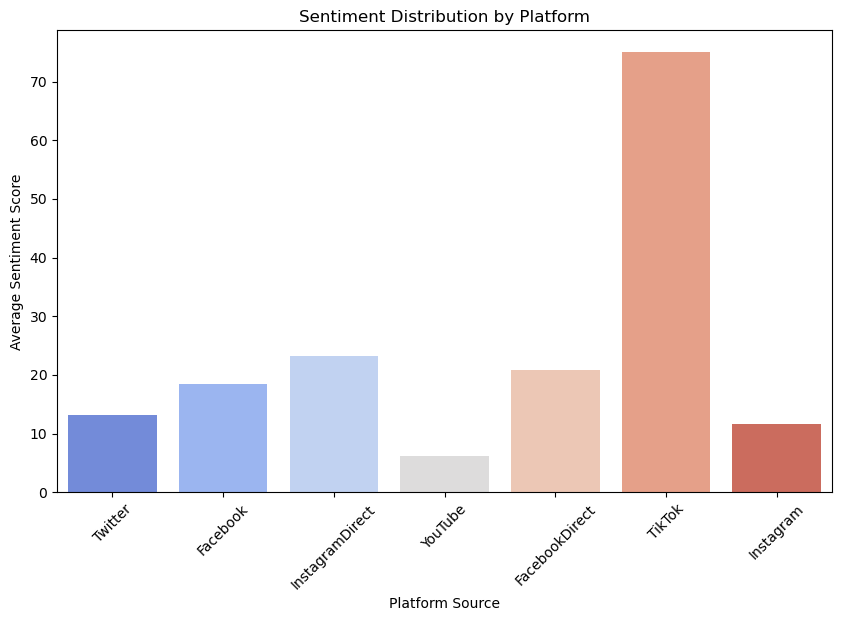

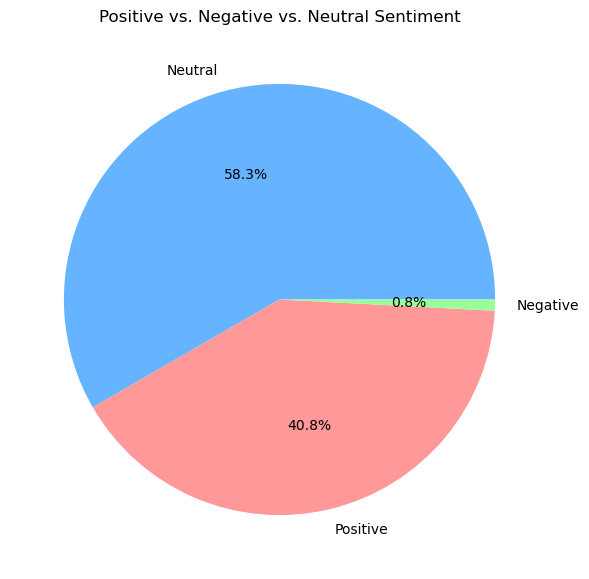

/var/folders/2y/wncyhkmj5b7_flmwn_r5_ym80000gn/T/ipykernel_15060/1002543788.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_extracted["Sentiment_Category"], palette="coolwarm", order=["Praise", "Supportive", "Neutral", "Skeptical", "Frustrated"])
/opt/anaconda3/envs/qtm151-f24/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


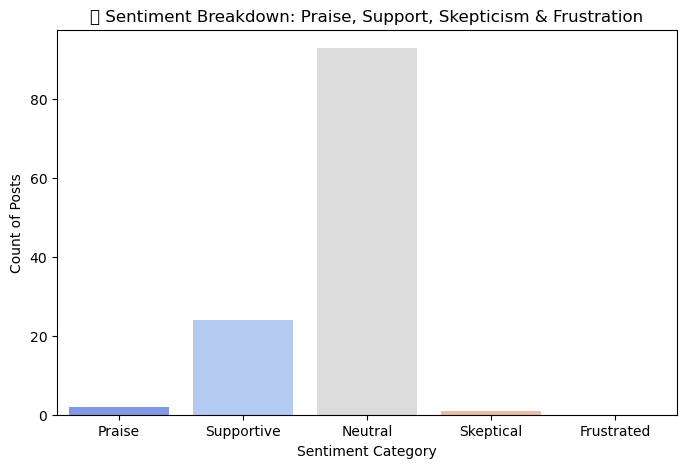

/opt/anaconda3/envs/qtm151-f24/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


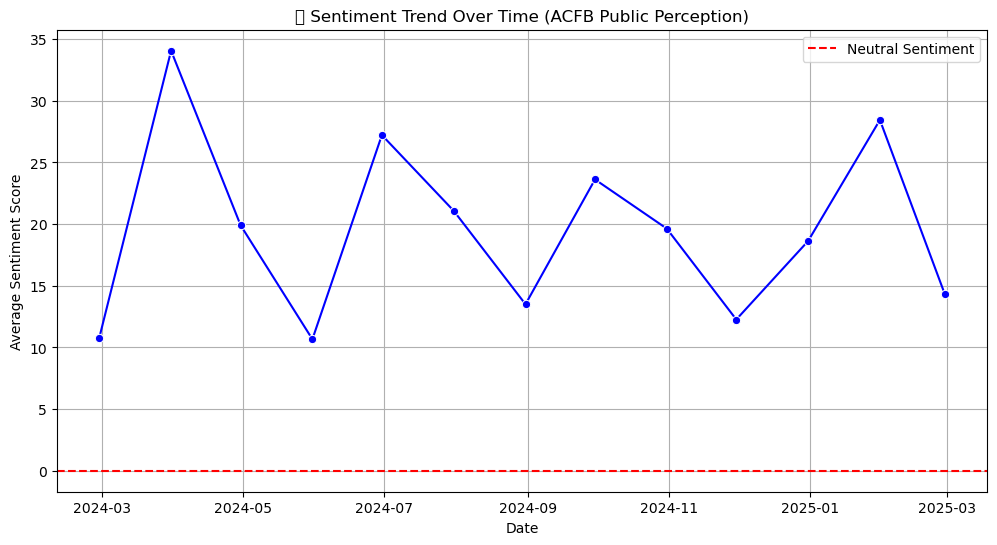

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis

# Load dataset (update file path as needed)
df = pd.read_csv("/Users/peterchen/Downloads/Atlanta Community Food Bank.csv", encoding='utf-8')

# Extract relevant columns
df_extracted = df[['PostId', 'post_body_text', 'Platform', 'LikesCount', 'SharesCount', 'CommentsCount', 'PostEngagement', 'published_at']].copy()

# Rename columns for consistency
df_extracted.rename(columns={
    'PostId': 'Comment_ID',
    'post_body_text': 'Text',
    'Platform': 'Source',
    'LikesCount': 'Likes',
    'SharesCount': 'Shares',
    'CommentsCount': 'Comments',
    'PostEngagement': 'Total_Engagement',
    'published_at': 'Timestamp'
}, inplace=True)

# Convert engagement columns to numeric
engagement_cols = ['Likes', 'Shares', 'Comments', 'Total_Engagement']
df_extracted[engagement_cols] = df_extracted[engagement_cols].apply(pd.to_numeric, errors='coerce')

# Sentiment Analysis Function (Using TextBlob)
def analyze_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0  # Neutral sentiment if text is empty
    sentiment_score = TextBlob(text).sentiment.polarity * 100  # Convert to scale -100 to 100
    return round(sentiment_score, 2)

# Apply Sentiment Analysis
df_extracted['Sentiment_Score'] = df_extracted['Text'].apply(analyze_sentiment)

# Categorize Sentiment Type
df_extracted['Sentiment_Type'] = df_extracted['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 20 else ('Negative' if x < -20 else 'Neutral')
)

# ---- 📊 Sentiment Distribution by Source ----
plt.figure(figsize=(10, 6))
sns.barplot(x="Source", y="Sentiment_Score", data=df_extracted, ci=None, palette="coolwarm")
plt.title("Sentiment Distribution by Platform")
plt.xticks(rotation=45)
plt.ylabel("Average Sentiment Score")
plt.xlabel("Platform Source")
plt.show()

# ---- 🥧 Sentiment Type Proportions ----
plt.figure(figsize=(7, 7))
df_extracted['Sentiment_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title("Positive vs. Negative vs. Neutral Sentiment")
plt.ylabel("")
plt.show()

# Classify sentiment into more detailed categories
def classify_sentiment(score):
    if score >= 70:
        return "Praise"
    elif score >= 30:
        return "Supportive"
    elif score <= -70:
        return "Frustrated"
    elif score <= -30:
        return "Skeptical"
    else:
        return "Neutral"

df_extracted["Sentiment_Category"] = df_extracted["Sentiment_Score"].apply(classify_sentiment)

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_extracted["Sentiment_Category"], palette="coolwarm", order=["Praise", "Supportive", "Neutral", "Skeptical", "Frustrated"])
plt.title("📊 Sentiment Breakdown: Praise, Support, Skepticism & Frustration")
plt.xlabel("Sentiment Category")
plt.ylabel("Count of Posts")
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

df_extracted["Timestamp"] = pd.to_datetime(df_extracted["Timestamp"], errors="coerce")
df_extracted["Sentiment_Score"] = pd.to_numeric(df_extracted["Sentiment_Score"], errors="coerce")
# Ensure Timestamp is set as index before resampling
df_time = df_extracted.set_index("Timestamp").resample("ME").agg({"Sentiment_Score": "mean"}).dropna()

# Convert Series to DataFrame and reset index for Seaborn compatibility
df_time = df_time.reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x="Timestamp", y="Sentiment_Score", marker="o", linestyle="-", color="blue")

plt.axhline(0, color="red", linestyle="dashed", label="Neutral Sentiment")
plt.title("📈 Sentiment Trend Over Time (ACFB Public Perception)")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid()
plt.show()

